In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Load 'HCAHPS - Hospital.csv' which contains the summary star ratings
d = os.path.dirname(os.getcwd())
data_file = os.path.join(d, 'data','raw','HCAHPS - Hospital.csv')
print(data_file)
survey_df = pd.read_csv(data_file, encoding = "ISO-8859-1")
print(survey_df.head())


C:\Research\Projects\Internal_Selfstudy\DSCT\Capstone project 1\hospital-surveys\data\raw\HCAHPS - Hospital.csv
   Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number     HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON    3347938701         H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON    3347938701       H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON    3347938701      H_CLEAN_HSP_SN_P   
3  DOTHAN    AL     36301     HOUSTON    3347938701       H_CLEAN_HSP_U_P   
4  DOTHAN    AL     36301     HOUSTON    33479

In [3]:
# Get some general information about the dataframe
print(len(survey_df.columns))
print(survey_df.info())

22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264660 entries, 0 to 264659
Data columns (total 22 columns):
Provider ID                              264660 non-null int64
Hospital Name                            264660 non-null object
Address                                  264660 non-null object
City                                     264660 non-null object
State                                    264660 non-null object
ZIP Code                                 264660 non-null int64
County Name                              263835 non-null object
Phone Number                             264660 non-null int64
HCAHPS Measure ID                        264660 non-null object
HCAHPS Question                          264660 non-null object
HCAHPS Answer Description                264660 non-null object
Patient Survey Star Rating               264660 non-null object
Patient Survey Star Rating Footnote      15864 non-null object
HCAHPS Answer Percent                    264660 non-null o

In [4]:
# Start cleaning
# Select relevant columns
survey_df_clean = survey_df[['Provider ID','Hospital Name','City', 'State', 'ZIP Code', 'HCAHPS Answer Description','Patient Survey Star Rating']]
print(survey_df_clean.head())

   Provider ID                     Hospital Name    City State  ZIP Code  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  DOTHAN    AL     36301   

               HCAHPS Answer Description Patient Survey Star Rating  
0                    Summary star rating                          3  
1                Room was "always" clean             Not Applicable  
2  Room was "sometimes" or "never" clean             Not Applicable  
3               Room was "usually" clean             Not Applicable  
4        Cleanliness - linear mean score             Not Applicable  


In [5]:
# Select only rows that contains summary start ratings
survey_df_clean = survey_df_clean[survey_df_clean['HCAHPS Answer Description'] == 'Summary star rating']
print(survey_df_clean.head())
print(survey_df_clean.info())

     Provider ID                     Hospital Name      City State  ZIP Code  \
0          10001  SOUTHEAST ALABAMA MEDICAL CENTER    DOTHAN    AL     36301   
55         10005     MARSHALL MEDICAL CENTER SOUTH      BOAZ    AL     35957   
110        10006    ELIZA COFFEE MEMORIAL HOSPITAL  FLORENCE    AL     35631   
165        10007          MIZELL MEMORIAL HOSPITAL       OPP    AL     36467   
220        10008       CRENSHAW COMMUNITY HOSPITAL   LUVERNE    AL     36049   

    HCAHPS Answer Description Patient Survey Star Rating  
0         Summary star rating                          3  
55        Summary star rating                          4  
110       Summary star rating                          3  
165       Summary star rating                          4  
220       Summary star rating              Not Available  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 0 to 264605
Data columns (total 7 columns):
Provider ID                   4812 non-null int64
Hospita

In [6]:
# Delete column 'HCAHPS Answer Description' 
survey_df_clean.drop('HCAHPS Answer Description', axis=1, inplace=True)
print(survey_df_clean.head())

     Provider ID                     Hospital Name      City State  ZIP Code  \
0          10001  SOUTHEAST ALABAMA MEDICAL CENTER    DOTHAN    AL     36301   
55         10005     MARSHALL MEDICAL CENTER SOUTH      BOAZ    AL     35957   
110        10006    ELIZA COFFEE MEMORIAL HOSPITAL  FLORENCE    AL     35631   
165        10007          MIZELL MEMORIAL HOSPITAL       OPP    AL     36467   
220        10008       CRENSHAW COMMUNITY HOSPITAL   LUVERNE    AL     36049   

    Patient Survey Star Rating  
0                            3  
55                           4  
110                          3  
165                          4  
220              Not Available  


In [7]:
# Rename the column 'Patient Survey Star Rating' to 'Summary star rating'
survey_df_clean.rename(columns = {'Patient Survey Star Rating':'Summary star rating'}, inplace=True)
print(survey_df_clean.head())

     Provider ID                     Hospital Name      City State  ZIP Code  \
0          10001  SOUTHEAST ALABAMA MEDICAL CENTER    DOTHAN    AL     36301   
55         10005     MARSHALL MEDICAL CENTER SOUTH      BOAZ    AL     35957   
110        10006    ELIZA COFFEE MEMORIAL HOSPITAL  FLORENCE    AL     35631   
165        10007          MIZELL MEMORIAL HOSPITAL       OPP    AL     36467   
220        10008       CRENSHAW COMMUNITY HOSPITAL   LUVERNE    AL     36049   

    Summary star rating  
0                     3  
55                    4  
110                   3  
165                   4  
220       Not Available  


3                1380
4                1335
Not Available    1322
2                 525
5                 195
1                  55
Name: Summary star rating, dtype: int64


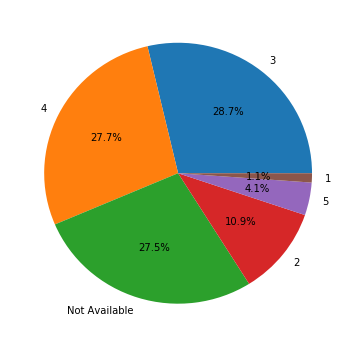

In [8]:
# Make a piechart to get a feel on the distribution of ratings
print(survey_df_clean['Summary star rating'].value_counts())
survey_df_clean['Summary star rating'].value_counts().plot.pie(figsize=(6, 6),autopct="%1.1f%%")
plt.ylabel('')
plt.show()

In [9]:
# Examine the Not Available values -> We notice that the unreported ratings are due to insufficient number of surveys
survey_df_less = survey_df[survey_df['HCAHPS Answer Description'] == 'Summary star rating']
survey_df_less = survey_df_less[survey_df_less['Patient Survey Star Rating'] == 'Not Available']
print(len(survey_df_less['Patient Survey Star Rating Footnote']=='15 - The number of cases/patients is too few to report a star rating.'))

1322


3    1380
4    1335
2     525
5     195
1      55
Name: Summary star rating, dtype: int64


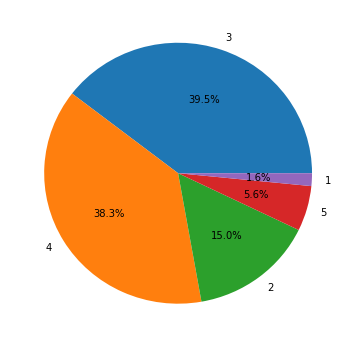

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 264110
Data columns (total 6 columns):
Provider ID            3490 non-null int64
Hospital Name          3490 non-null object
City                   3490 non-null object
State                  3490 non-null object
ZIP Code               3490 non-null int64
Summary star rating    3490 non-null object
dtypes: int64(2), object(4)
memory usage: 190.9+ KB
None


In [10]:
# Drop the hospitals with no ratings available
survey_df_clean.drop(survey_df_clean[survey_df_clean['Summary star rating']=='Not Available'].index, inplace=True)
print(survey_df_clean['Summary star rating'].value_counts())
survey_df_clean['Summary star rating'].value_counts().plot.pie(figsize=(6, 6),autopct="%1.1f%%")
plt.ylabel('')
plt.show()
print(survey_df_clean.info())

In [11]:
# Load 'Hospital General information.csv'
data_file2 = os.path.join(d, 'data','raw','Hospital General Information.csv')
print(data_file2)
general_df = pd.read_csv(data_file2, encoding = "ISO-8859-1")
print(general_df.head())

C:\Research\Projects\Internal_Selfstudy\DSCT\Capstone project 1\hospital-surveys\data\raw\Hospital General Information.csv
   Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON    3347938701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON    3344933541  Acute Care Hospitals   
4

In [12]:
# Get some general information about the dataframe
print(len(general_df.columns))
print(general_df.info())

28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
Provider ID                                                      4812 non-null int64
Hospital Name                                                    4812 non-null object
Address                                                          4812 non-null object
City                                                             4812 non-null object
State                                                            4812 non-null object
ZIP Code                                                         4812 non-null int64
County Name                                                      4797 non-null object
Phone Number                                                     4812 non-null int64
Hospital Type                                                    4812 non-null object
Hospital Ownership                                               4812 non-null object
Emergency Services               

In [13]:
# select columns from the hospital general dataframe
general_df_less = general_df[['Provider ID','Hospital Type', 'Hospital Ownership',
                             'Emergency Services','Meets criteria for meaningful use of EHRs',
                             'Mortality national comparison', 'Safety of care national comparison',
                             'Readmission national comparison','Effectiveness of care national comparison',
                             'Timeliness of care national comparison','Efficient use of medical imaging national comparison']]
print(general_df_less.head())
# This is by default an inner join
survey_df_clean = pd.merge(survey_df_clean, general_df_less, on = 'Provider ID')
print(survey_df_clean.info())

   Provider ID         Hospital Type  \
0        10001  Acute Care Hospitals   
1        10005  Acute Care Hospitals   
2        10006  Acute Care Hospitals   
3        10007  Acute Care Hospitals   
4        10008  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  \
0  Government - Hospital District or Authority                Yes   
1  Government - Hospital District or Authority                Yes   
2  Government - Hospital District or Authority                Yes   
3               Voluntary non-profit - Private                Yes   
4                                  Proprietary                Yes   

  Meets criteria for meaningful use of EHRs Mortality national comparison  \
0                                         Y  Same as the national average   
1                                         Y    Below the national average   
2                                         Y    Below the national average   
3                                   